In [28]:
import pandas as pd

import tensorflow as tf

from sklearn.preprocessing import StandardScaler

STONKS ONLY GO UP

1. Apple (AAPL)
2. Microsoft (MSFT)
3. Texas Instruments (TXN)
4. Sony (SONY)
5. Google (GOOG)
6. Tesla (TSLA)
7. Coke (KO)
8. Chipotle (CMG)
9. NVIDIA (NVDA)
10. AMD (AMD)

Maybes
1. Facebook (FB)
2. Intel (INTC)

Stable Stocks
1. S&P 500 (VOO or SPY)
2. NASDAQ 100


In [7]:
gpus = tf.config.list_physical_devices('GPU')

if gpus:

  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU

  try:

    tf.config.set_logical_device_configuration(

        gpus[0],

        [tf.config.LogicalDeviceConfiguration(memory_limit=2048)])

    logical_gpus = tf.config.list_logical_devices('GPU')

    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")

  except RuntimeError as e:

    # Virtual devices must be set before GPUs have been initialized

    print(e)

1 Physical GPUs, 1 Logical GPUs


2022-04-15 11:12:53.464711: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-04-15 11:12:53.465215: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-04-15 11:12:53.490789: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-15 11:12:53.490899: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.65GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2022-04-15 11:12:53.490918: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-04-15 11:12:53.509083: I tensorflow/stream_executor/platform

In [40]:
# Load data here
import pandas as pd
import numpy as np

df = pd.read_csv('MSFT.csv')
dataset = df.values
print(df.Date)

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9091    2022-04-06
9092    2022-04-07
9093    2022-04-08
9094    2022-04-11
9095    2022-04-12
Name: Date, Length: 9096, dtype: object


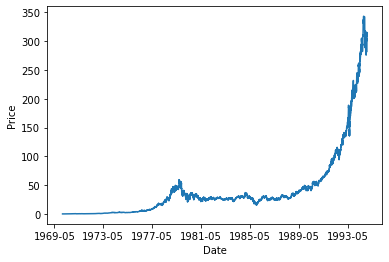

In [46]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots()

fmt_half_year = mdates.MonthLocator(interval=48)
ax.xaxis.set_major_locator(fmt_half_year)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.plot(df.Date, df.Close)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [59]:
# preparing data for LSTM

df = df.drop(['Date'], axis=1)
feature_columns = ['Volume']
train_X = df.loc[:,feature_columns]
train_y = df.Close


dataset = dataset.astype('float32')

def create_dataset(n_X, look_back):
  data_X, data_y = [], []
  for i in range(len(n_X) - look_back):
    a = n_X[i:(i+look_back),]
    data_X.append(a)
    data_y.append(n_X[i + look_back, ])

train_X = train_X.values
print(len(train_X))
reshaped_train_X = train_X.reshape(1, 9096, 1)
train_y = train_y.values

KeyError: "['Date'] not found in axis"

In [26]:
# Creating the model and loading the model

look_back = 1

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(4))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [27]:
# Fitting the model

model.fit(train_X.values, train_y.values, epochs=200)


AttributeError: 'numpy.ndarray' object has no attribute 'values'